# Introduction
This project aims to investigate the discrepancy between the actual rating of a movie and the rating displayed on the Fandango ratings site.

This follows an [analysis](https://fivethirtyeight.com/features/fandango-movies-ratings/) performed by data jounralist Walt Hickey in 2015 in which he found that Fandango's ratings system was biased and dishonest. Walt reported that movie ratings were regularly being rounded up to either the nearest half or even nearest whole star. The differences in actual vs reported ratings are shown in the image below.

<img src="inflated_rating.png" width="400">

More recent movie ratings data will be analysed in this project to investigate whether Fandango has corrected this error in their reporting. The original data used for Hickey's 2015 analaysis can be found [here](https://github.com/fivethirtyeight/data/tree/master/fandango) and the more recent data is available on [this](https://github.com/mircealex/Movie_ratings_2016_17) web page

In [1]:
#Import libraries and read csv files
import pandas as pd

before_analysis = pd.read_csv('fandango_score_comparison.csv')
after_analysis = pd.read_csv('movie_ratings_16_17.csv')

print("Columns in dataset before analysis:\n", before_analysis.columns)
print("\nColumns in dataset before analysis:\n",after_analysis.columns)

Columns in dataset before analysis:
 Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

Columns in dataset before analysis:
 Index(['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango',
       'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore',
       'nr_imdb', 'nr_tmeter', 'nr_audience'],
      dtype='object')


In [2]:
before_analysis_data = before_analysis[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 
                                        'Fandango_votes', 'Fandango_Difference']].copy()
after_analysis_data = after_analysis[['movie', 'year', 'fandango']].copy()

The goal of this project is to assess whether or not there has been any change in Fandango's reporting of a movie's rating since Hickey's analysis. The population of interest for this project is therefore all movies stored on Fandango's website.

To complete an analysis of ratings before and after Hickey's analysis, we need to sample Fandango movie ratings data before and after his analysis. The data that is being used in this project can be considered as samples of movie ratings data on the Fandango website. In order to make inferences about the population, we need to ensure each sample of the data is representative of the whole pupulation. If the data is not representative, it is very likely that we will arrive at incorrect conclusions.

The data for each sample of data was collected according to different sets of criteria. The critearia for Hickey's analysis can be found [here](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md). The criteria for the data collected after Hickey's analysis can be found [here](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md)

To be included in Hickey's study, a movie required a) at least 30 fan ratings and b) tickets on sale in 2015. This indicates that Hickey's sample is not representative since every movie did not have an equal chance of being included in the sample data. In addition to this issue, both sets of movie data are unlikely to be representative of the population (all movies on the website) since, for example, there is no way of knowing if movies released during the years selected for these samples were exceptionally good/bad compared to other years.

These samples may have good enough for the purpose of the author's research in each of the samples, but they are not representative for this analysis.

# Changing the goal of our analysis

As concluded above, the data available in these samples is not representative enough to determine whether or not Fandango's rating system has changed since Hickey's analysis.

This leaves us with two options. We can either:
1. Abandon this study in its current form and collect new data that is more representative of the population
2. Change the goal of our analysis

The project notes suggest changing our goal to determine whether there has been any difference between Fandango's ratings for **popular** movies in 2015 and **popular** movies in 2016. This will therefore be the new goal for this project.

Because Hickey used a criteria of 30 fan ratings to include a movie in his sample, we will use this number to define a movie as being "popular". The notes for this project indicated that the number of fan reviews for each movie in the sample collected after Hickey's analysis should be checked on the Fandango website to get an idea of their representativeness. Unfortunately, Fandango has replaced their 5-star fan ratings with the Rotten Tomatoes Audience Score. This is interesting because that may be due to Hickey's findings! In any case, the notes indicated that 90% of the movies in this sample meet our definition of a movie being "popular" (the project was created at a time when Fandango still indicated their number of fan reviews). We can therefore move forward with this analysis.

# Data Exploration

Let's have a quick look at the first 20 rows of each dataset to investigate the type of information available to us:

In [3]:
#Check first 15 rows of data collected before Hickey's analysis:
before_analysis_data.head(15)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
5,The Water Diviner (2015),4.5,4.0,397,0.5
6,Irrational Man (2015),4.0,3.5,252,0.5
7,Top Five (2014),4.0,3.5,3223,0.5
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5
9,Love & Mercy (2015),4.5,4.0,864,0.5


In [4]:
#Check first 15 rows of data collected after Hickey's analysis:

after_analysis_data.head(15)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
6,A Street Cat Named Bob,2016,4.5
7,Alice Through the Looking Glass,2016,4.0
8,Allied,2016,4.0
9,Amateur Night,2016,3.5


It is clear that each dataset contains movies released during years that are not within the scope of this analysis (2015 & 2016). Movies released in 2015 and 2016 should therefore be isolated from each set.

Due to the format of each dataset, the way the year is extracted and then identified has to be approached in two different ways. The format used to indicate the year of a movie for each dataset is outlined below:
- 2015 - Year stored as text in same cell as movie title
- 2016 - Year stored in isolated, numerical column

In [5]:
movies_2015 = before_analysis_data[before_analysis_data["FILM"].str.contains("2015")]
movies_2016 = after_analysis_data[after_analysis_data["year"] == 2016]

#Number of movies in dataset before Hickey's analysis
print("Number of movies in dataset before Hickey's analysis:", len(before_analysis_data))
#Number of 2015 movies from before Hickey's analysis
print("Number of 2015 movies in dataset after Hickey's analysis:", len(movies_2015),"\n")

#Number of movies in dataset after Hickey's analysis
print("Number of movies in dataset after Hickey's analysis:", len(after_analysis_data))
#Number of 2016 movies from after Hickey's analysis
print("Number of 2016 movies in dataset after Hickey's analysis:", len(movies_2016),"\n")

#Print unique years in movies_2016 to confirm correct boolean indexing 
print("Unique years in movies_2016:", movies_2016['year'].unique())

Number of movies in dataset before Hickey's analysis: 146
Number of 2015 movies in dataset after Hickey's analysis: 129 

Number of movies in dataset after Hickey's analysis: 214
Number of 2016 movies in dataset after Hickey's analysis: 191 

Unique years in movies_2016: [2016]


The number of movies has decreased for each dataset indicating that boolean indexing to select only movies from 2015 and 2016 has worked correctly. An additional check was done for the dataset after Hickey's analysis since the year for this dataset is stored in its own column

We can now start analyzing the data in each of the two isolated samples. Let's start by making a high-level comparison between the shapes of the districbutions of movie ratings for each sample:

In [6]:
import matplotlib.pyplot as plt
import numpy as np

#Plot kernel density plots to show frequency of each rating
movies_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
movies_2016['fandango'].plot.kde(label = '2016', legend = True)

#Add plot information
plt.title("Fandango.com Popular Movie Ratings - 2015 vs 2016 ")
plt.xlabel("Number of stars")
plt.ylabel("Density")
plt.xticks(np.arange(0,5.5,0.5))
plt.style.use('fivethirtyeight')
plt.legend()

plt.show()

<Figure size 800x550 with 1 Axes>

# Analyis - 2015 vs 2016

There are two very clear observations that can be made from the chart above:
- Both distributions are very negatively skewed
- The data for movies released in 2016 is shifted to the left relative to the 2015 movie data


The first point above indicates that most movies on Fandango are given high to very high ratings. The second point indicates there may have been a reaction by Fandango following Hickey's study on the 2015 data since the ratings for popular movies released in 2016 were lower than those released in 2015. 

# Frequency Distributions

The kernel density plots were a good start for comparing the distributions of each dataset. Let's have a look at the distributions in a tabular format.

The tables below have been normalized to show the frequency of each ratings as a percentage since there is a different number of movies in each sample

In [7]:
print("Frequency of ratings in 2015 movie sample:")
distr_2015 = movies_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100
print(distr_2015)

Frequency of ratings in 2015 movie sample:
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64


In [8]:
print("Frequency of ratings in 2016 movie sample:")
distr_2016 = movies_2016['fandango'].value_counts(normalize = True).sort_index() * 100
print(distr_2016)

Frequency of ratings in 2016 movie sample:
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


It is clear from the frequency distributions above that the frequency of very high ratings (4.5 and 5 stars) decreased between 2015 and 2016. Nearly 7% of movies in the 2015 sample had a 5 star rating, whereas less than 1% of movies in the 2016 sample had 5 star ratings. This trend is similar for 4.5 star ratings, which were awared to 38% of movies in the 2015 sample and only 24.6% in the 2015 sample.

The range of ratings also increased in 2016. All ratings in the 2015 sample were between 3.0 and 5.0 stars, whereas ratings in the 2016 sample covered a range of 2.5 to 5 stars. This is another indicator of the left-shift shown in the kernel density plots shown above.

A higher percentage of movies received 3.5 and 4 star ratings in 2016. It is interesting to note that there was a drop of approximately 20% in movies that received either 4.5 or 5 star ratings in 2016 and an increase of approximately 18% in ratings of either 3.5 or 4 stars. This indicates the left-shit in 2016 data may have been largely due to a focussed reduction of reported rating in the high to very high range.

The increase in movies receiving 3.5 and 4 star ratings disagrees with the general left-shift seen across the whole of the sample, so some more investigation is required

# Compare summary statistics

Whilst there was a decrease in movies with a very high rating in 2016, there was a significant increase in movies with medium to high ratings, which cast some doubt on the direction of the difference between these years. To get a better indication of the direction change, let's compare the summary statistics (mean, median, mode) below:

In [9]:
print('Sample Means\n============')
mean_2015 = round(movies_2015['Fandango_Stars'].mean(),3)
mean_2016 = round(movies_2016['fandango'].mean(),3)
print('2015 sample:',mean_2015)
print('2016 sample:',mean_2016)

print('\n')
print('Sample Medians\n============')
median_2015 = movies_2015['Fandango_Stars'].median()
median_2016 = movies_2016['fandango'].median()
print('2015 sample:',median_2015)
print('2016 sample:',median_2016)


print('\n')
print('Sample Modes\n============')
mode_2015 = movies_2015['Fandango_Stars'].mode()[0]
mode_2016 = movies_2016['fandango'].mode()[0]
print('2015 sample:',mode_2015)
print('2016 sample:',mode_2016)

Sample Means
2015 sample: 4.085
2016 sample: 3.887


Sample Medians
2015 sample: 4.0
2016 sample: 4.0


Sample Modes
2015 sample: 4.5
2016 sample: 4.0


The data above can be viewed and compared more easily if it is presented as a table and/or plotted on a bar chart

In [10]:
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
#Replace numbers in index column with descripttions
summary.index = ['mean','median','mode']
summary

,2015,2016
mean,4.085,3.887
median,4.000,4.000
mode,4.500,4.000


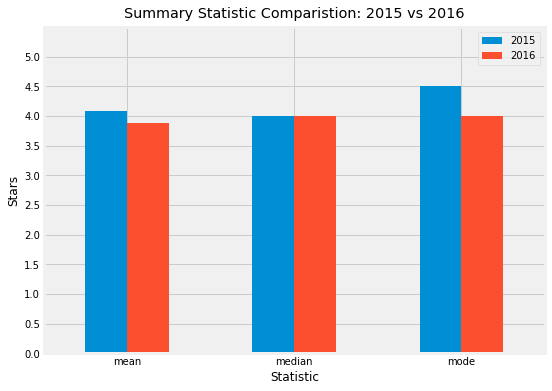

In [11]:
summary.plot.bar(label = '2015', legend = True, figsize = (8,6))

plt.title("Summary Statistic Comparistion: 2015 vs 2016",y = 1.01)
plt.xlabel("Statistic")
plt.ylabel("Stars")
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,5.1,0.5))
plt.ylim(0,5.5)
plt.legend()

plt.savefig('comparison.png', bbox_inches='tight')
plt.show()

The chart above indicates that the mean movie rating decreased from 2015 to 2016 by approximately 0.2 stars. The mode of the sample movie ratings also decreased from 4.5 stars in 2015 to 4 stars in 2016.

In [12]:
#Check percentage drop for mean rating from 2015 to 2016
round(100*(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][1],2)

5.09

The 0.2 star drop in the mean corresponds to a 5% reduction relative to 2015.

While the median was the same in both years, the lowering of both the mean and mode confirm what was shown on the kernel density plots earlier in this project: on average, there was a reduction in the rating of popular movies between 2015 and 2016 on the Fandango website

# Conclusion

The aim of this project was to investigate discrepencies between actual movie ratings and those reported on the Fandango webpage. More specifically, a comparison was done between Fandango's ratings for popular movies released in 2015 and 2016. 

Walt Hickey found that Fandango seemed to be inflating 2015 movie ratings and released a report about his findings. To investigate any reaction by Fandango, this project compared the 2015 movie ratings used in Hickey's analysis to more recent data on movies released in 2016.

The analysis completed during this project showed that there was a reduction in reported movie reviews on the Fandango website between 2015 and 2016. We can't be sure, but this may well have been due to Hickey's analysis presented in the introduction to this project. The differences between the mean, median and mode for popular 2015 and 2016 movies is shown in the chart below.

<img src="comparison.png" width="500">

While there was a reduction between these two years, it was found that Fandango has in fact replaced their "5-star fan ratings" with the Rotten Tomatoes Audience Score. This may indicate there was still a discrepency in the Fandango ratings compared to other popular websites even after their rating correction/reduction in 2016.